Estimate the crop yield using data analytics

Team ID:PNT2022TMID42779 

Project Name:Estimate The Crop Yield Using Data Analytics   

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR



crops_data = pd.read_csv('/content/drive/MyDrive/crop_production.csv')

In [31]:
crops_data['Season'] = crops_data['Season'].str.rstrip()
crops_data['Crop_Year']=crops_data['Crop_Year'].astype(str)

VISUALIZATION

Visualization of area and production of a crop for all over india



             Production         Area
Crop_Year                           
1997       6.584850e+07  30706467.00
1998       7.876122e+07  38716952.00
1999       7.791707e+07  37058642.00
2000       8.309270e+07  43190618.00
2001       9.005787e+07  42745829.00
2002       7.145340e+07  40795160.29
2003       8.783597e+07  43181631.06
2004       8.417252e+07  42664665.23
2005       8.958719e+07  43519563.58
2006       9.167629e+07  43266797.59
2007       9.206481e+07  42026154.31
2008       9.526127e+07  43597987.00
2009       8.735634e+07  40583697.00
2010       9.517621e+07  41766900.50
2011       1.020939e+08  42011893.74
2012       1.003305e+08  47765615.00
2013       1.028728e+08  40485966.00
2014       1.040182e+08  39088073.00
2015       5.893687e+06   3952669.00
Bar plot of the above data
Line plot of the above data


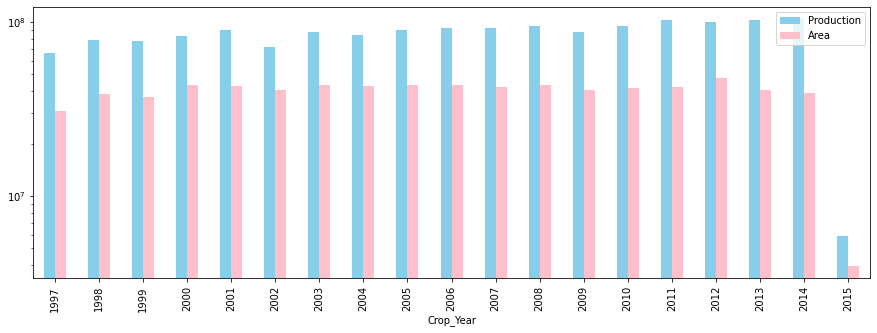

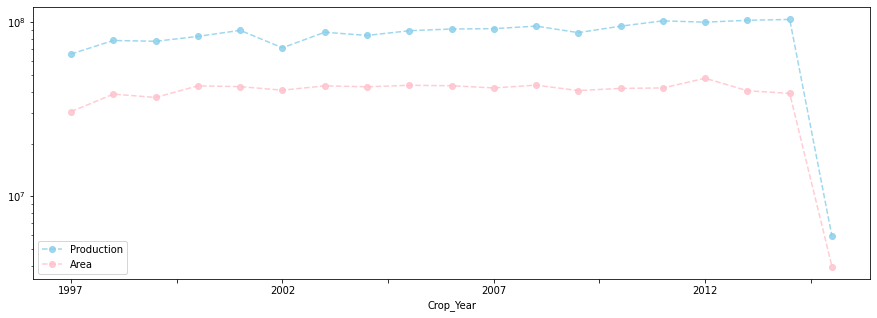

In [42]:
cultivation_data = crops_data[['Crop_Year', 'Crop', 'Area', 'Production']]
y='Rice'
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
    
print(cultivation_data)
print("Bar plot of the above data")
cultivation_data.dropna().plot(kind='bar', figsize=(15,5), logy=True, color=['skyblue', 'pink'])
print("Line plot of the above data")
cultivation_data.dropna().plot(figsize=(15,5), logy=True, color=['skyblue', 'pink'], linestyle='dashed', marker='o', alpha=0.8, markersize=6)

Visualization of area and production of a crop for a state



           Production       Area
Crop_Year                       
1997        2255230.0  2525653.0
1998        3254833.0  2454122.0
1999        3860648.0  2645868.0
2000        3998443.0  2646177.0
2001        3854248.0  2536421.0
2002        3737802.0  2540680.0
2003        3880934.0  2529826.0
2004        3470750.0  2383731.0
2005        3552438.0  2420327.0
2006        2916014.0  2196559.0
2007        3318608.0  2323996.0
2008        4008435.0  2484126.0
2009        4408424.0  2497596.0
2010        5032529.0  2537455.0
2011        4715678.0  2545706.0
2012        5120052.0  2484728.0
2013        5193379.0  2503201.0
2014        5222645.0  2495297.0
Bar plot of the above data
Line plot of the above data


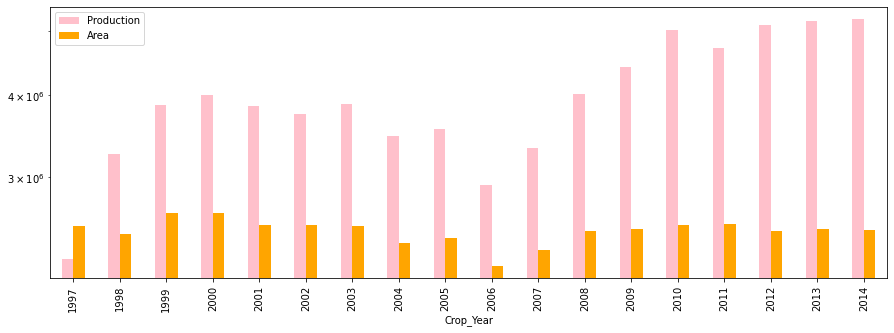

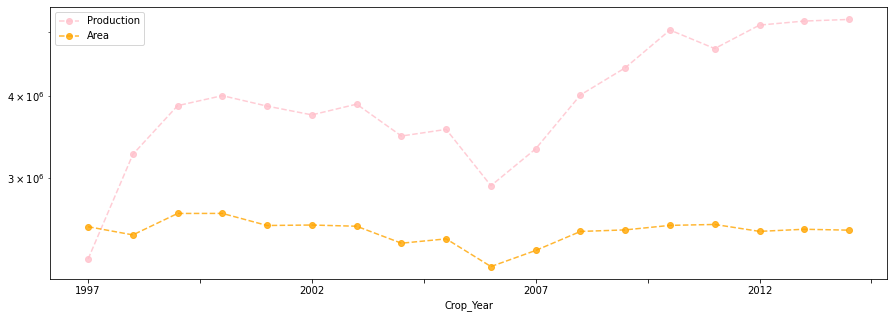

In [43]:
x='Assam'
y='Rice'
cultivation_data = crops_data[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
    
cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
    
print(cultivation_data)
print("Bar plot of the above data")
cultivation_data.dropna().plot(kind='bar', figsize=(15,5), logy=True, color=['pink', 'orange'])
print("Line plot of the above data")
cultivation_data.dropna().plot(figsize=(15,5), logy=True, color=['pink', 'orange'], linestyle='dashed', marker='o', alpha=0.8, markersize=6)

Visualization of area and production of a crop for a district



           Production     Area
Crop_Year                     
1997         111879.0  60630.0
1998          82880.0  57264.0
1999         103525.0  59213.0
2000         112201.0  58729.0
2001         110649.0  63214.0
2002          54818.0  50275.0
2003          67205.0  51111.0
2004          91091.0  52351.0
2005         107219.0  56431.0
2006         102139.0  54196.0
2007         104886.0  53798.0
2008         126496.0  61277.0
2009          36498.0  18033.0
2010          38197.0  20449.0
2011          61250.0  24795.0
2012          68324.0  24874.0
2013          80474.0  28871.0
2014          73123.0  24683.0
Bar plot of the above data
Line plot of the above data


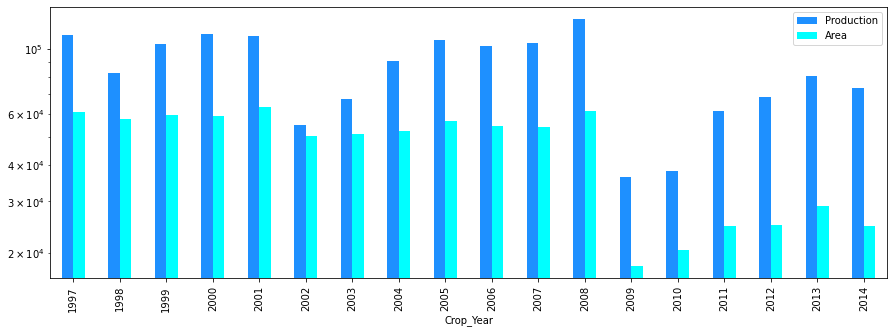

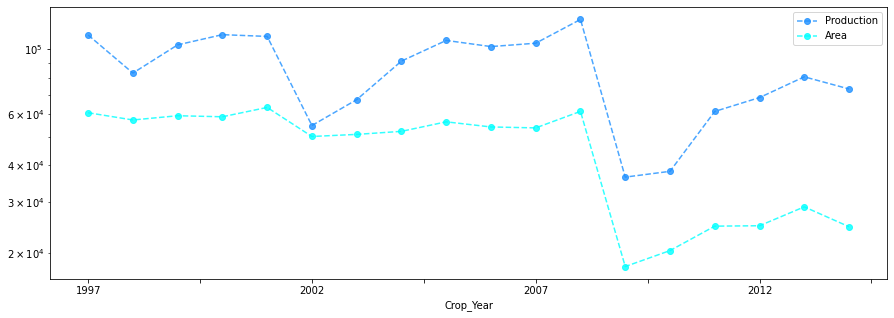

In [45]:
x='Uttar Pradesh'
z='ETAH'
y='Maize'
cultivation_data = crops_data[['State_Name','District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
  
cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('District_Name').get_group(z)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
  
print(cultivation_data)
print("Bar plot of the above data")
cultivation_data.dropna().plot(kind='bar', figsize=(15,5), logy=True, color=['dodgerblue', 'aqua'])
print("Line plot of the above data")
cultivation_data.dropna().plot(figsize=(15,5), logy=True, color=['dodgerblue', 'aqua'], linestyle='dashed', marker='o', alpha=0.8, markersize=6)

Visualization of area and production of a crop for a season



           Production       Area
Crop_Year                       
1997       1581811.00  766599.00
1998       1474120.00  735384.00
1999       1384450.80  661382.00
2000       1418342.00  763969.00
2001       1417975.00  655001.00
2002       1378805.10  664523.00
2003       1305483.28  653910.82
2004       1172234.24  602355.57
2005       1182174.00  614635.00
2006       1245089.00  556516.00
2007       1196129.20  603529.00
2008       1669726.20  685198.00
2009       1209578.00  490359.00
2010       1690447.00  677806.00
2011        649362.00  248663.00
2012        709068.00  266497.00
2013        553455.30  217921.00
2014        372072.00  219863.00
2015           472.00     447.00
Bar plot of the above data
Line plot of the above data


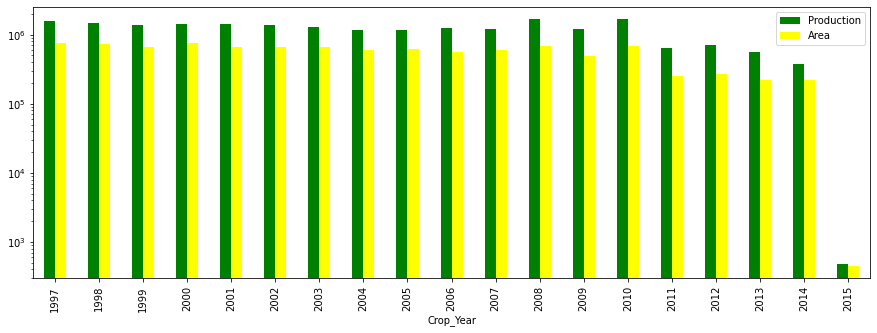

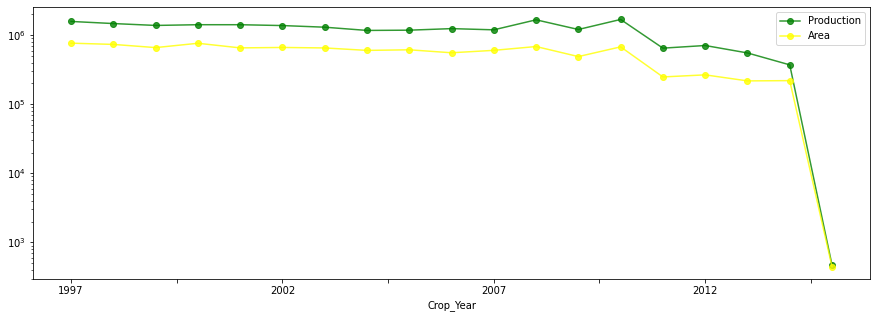

In [49]:
x='Rabi'
z='Barley'
cultivation_data=crops_data[['Season', 'Crop_Year', 'Crop', 'Area', 'Production']]
cultivation_data=cultivation_data.groupby('Season').get_group(x)
cultivation_data=cultivation_data.groupby('Crop').get_group(z)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
  
print(cultivation_data)
print("Bar plot of the above data")
cultivation_data.dropna().plot(kind='bar', figsize=(15,5), logy=True, color=['green', 'yellow'])
print("Line plot of the above data")
cultivation_data.dropna().plot(figsize=(15,5), logy=True, color=['green', 'yellow'], linestyle='solid', marker='o', alpha=0.8, markersize=6)

In [51]:
cropdata = pd.read_csv("/content/drive/MyDrive/crop_production.csv")
print(cropdata.size)
print(cropdata.head())
print(set(cropdata['State_Name']))
print(cropdata.columns)
print(set(cropdata['Season']))
print(set(cropdata['Crop']))
print(set(cropdata['Crop_Year']))

1722637
                    State_Name District_Name  Crop_Year       Season                 Crop    Area  Production
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif                  Arecanut  1254.0      2000.0
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif       Other Kharif pulses     2.0         1.0
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif                      Rice   102.0       321.0
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year                Banana   176.0       641.0
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year             Cashewnut   720.0       165.0
{'Mizoram', 'Assam', 'Goa', 'Andaman and Nicobar Islands', 'Arunachal Pradesh', 'Madhya Pradesh', 'Sikkim', 'Jharkhand', 'West Bengal', 'Manipur', 'Jammu and Kashmir ', 'Puducherry', 'Rajasthan', 'Uttarakhand', 'Himachal Pradesh', 'Chandigarh', 'Chhattisgarh', 'Kerala', 'Bihar', 'Uttar Pradesh', 'Odisha', 'Telangana ', 'Punjab', '

         State_Name District_Name  Crop_Year       Season          Crop     Area  Production
203  Andhra Pradesh     ANANTAPUR       1997  Kharif          Arhar/Tur  21400.0      2600.0
204  Andhra Pradesh     ANANTAPUR       1997  Kharif              Bajra   1400.0       500.0
205  Andhra Pradesh     ANANTAPUR       1997  Kharif        Castor seed   1000.0       100.0
206  Andhra Pradesh     ANANTAPUR       1997  Kharif       Cotton(lint)   7300.0      9400.0
207  Andhra Pradesh     ANANTAPUR       1997  Kharif       Dry chillies   3700.0      7100.0
         State_Name District_Name  Crop_Year       Season          Crop     Area  Production
288  Andhra Pradesh     ANANTAPUR       2000  Kharif          Arhar/Tur  30693.0      7888.0
289  Andhra Pradesh     ANANTAPUR       2000  Kharif              Bajra   2477.0      1449.0
290  Andhra Pradesh     ANANTAPUR       2000  Kharif        Castor seed   9315.0      2831.0
291  Andhra Pradesh     ANANTAPUR       2000  Kharif       Cotton(lint

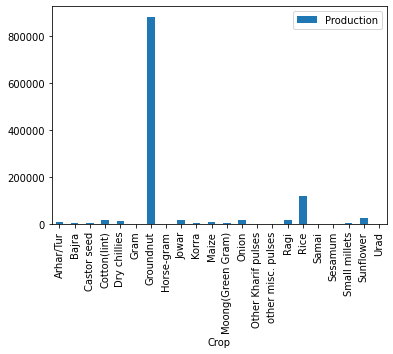

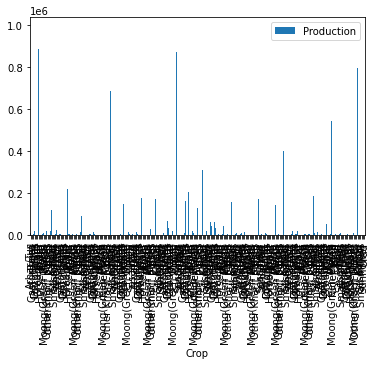

In [55]:
crop_ap = cropdata[cropdata["State_Name"]=="Andhra Pradesh"]
print(crop_ap.head())
crop_ap_2000 = crop_ap[crop_ap["Crop_Year"]==2000]
crop_ap_2000_wholeyear = crop_ap_2000[crop_ap_2000["Season"]=="Kharif     "]
print(crop_ap_2000.head())
print(crop_ap.size)
print(crop_ap_2000.size)
print(crop_ap_2000_wholeyear.size)
print(crop_ap_2000_wholeyear.head())
ananthapur = crop_ap_2000_wholeyear[crop_ap_2000_wholeyear["District_Name"]=="ANANTAPUR"]
ananthapur.plot(kind="bar",x="Crop",y="Production")
crop_ap_2000_wholeyear.plot(kind="bar",x="Crop",y="Production")

In [56]:
states_set = set(cropdata['State_Name'])
print(states_set)
year_set = set(cropdata['Crop_Year'])
print(year_set)

{'Mizoram', 'Assam', 'Goa', 'Andaman and Nicobar Islands', 'Arunachal Pradesh', 'Madhya Pradesh', 'Sikkim', 'Jharkhand', 'West Bengal', 'Manipur', 'Jammu and Kashmir ', 'Puducherry', 'Rajasthan', 'Uttarakhand', 'Himachal Pradesh', 'Chandigarh', 'Chhattisgarh', 'Kerala', 'Bihar', 'Uttar Pradesh', 'Odisha', 'Telangana ', 'Punjab', 'Meghalaya', 'Tamil Nadu', 'Maharashtra', 'Tripura', 'Andhra Pradesh', 'Dadra and Nagar Haveli', 'Haryana', 'Gujarat', 'Nagaland', 'Karnataka'}
{1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}


In [58]:
print(cropdata.head())
print(cropdata.describe())

                    State_Name District_Name  Crop_Year       Season                 Crop    Area  Production
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif                  Arecanut  1254.0      2000.0
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif       Other Kharif pulses     2.0         1.0
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif                      Rice   102.0       321.0
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year                Banana   176.0       641.0
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year             Cashewnut   720.0       165.0
           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+

In [60]:
crop_processed_data = pd.DataFrame(columns = ['State','Year','Crop','Area','Production'])
print(crop_processed_data)

Empty DataFrame
Columns: [State, Year, Crop, Area, Production]
Index: []


In [61]:
cropdata = cropdata.drop('Season',axis = 1)
cropdata = cropdata.drop('District_Name',axis = 1)

In [64]:
crop_processed_data

,State,Year,Crop,Area,Production
0,Mizoram,1997,Sunflower,6.00,7.000000e+00
1,Mizoram,1997,Tapioca,478.00,6.956000e+03
2,Mizoram,1997,Potato,0.00,0.000000e+00
3,Mizoram,1997,Tobacco,377.00,4.150000e+02
4,Mizoram,1997,Masoor,0.00,0.000000e+00
5,Mizoram,1997,Peas & beans (Pulses),231.00,2.710000e+02
6,Mizoram,1997,Rice,68114.00,1.105730e+05
7,Mizoram,1997,Kapas,962.00,4.270000e+02
8,Mizoram,1997,Arhar/Tur,131.00,2.120000e+02
9,Mizoram,1997,Sesamum,4592.00,4.443000e+03


           Production_of_district1  Area_of_district1  Production_of_district2  Area_of_district2
Crop_Year                                                                                        
1997                    10598000.0             9524.0               10287746.0           182084.0
1998                     3617820.0            16133.0                9810316.0           189213.0
1999                     1622842.0            13515.0               10924730.0           189363.0
2000                     1569245.0            12673.0                9630935.0           191836.0
2001                     1711000.0            10790.0               11500462.0           215963.0
2002                      878040.0            10590.0               12005641.0           224036.0
2003                      692993.0             6988.0               10975023.0           219325.0
2004                      723302.0             5940.0               12790789.0           211097.0
2005                

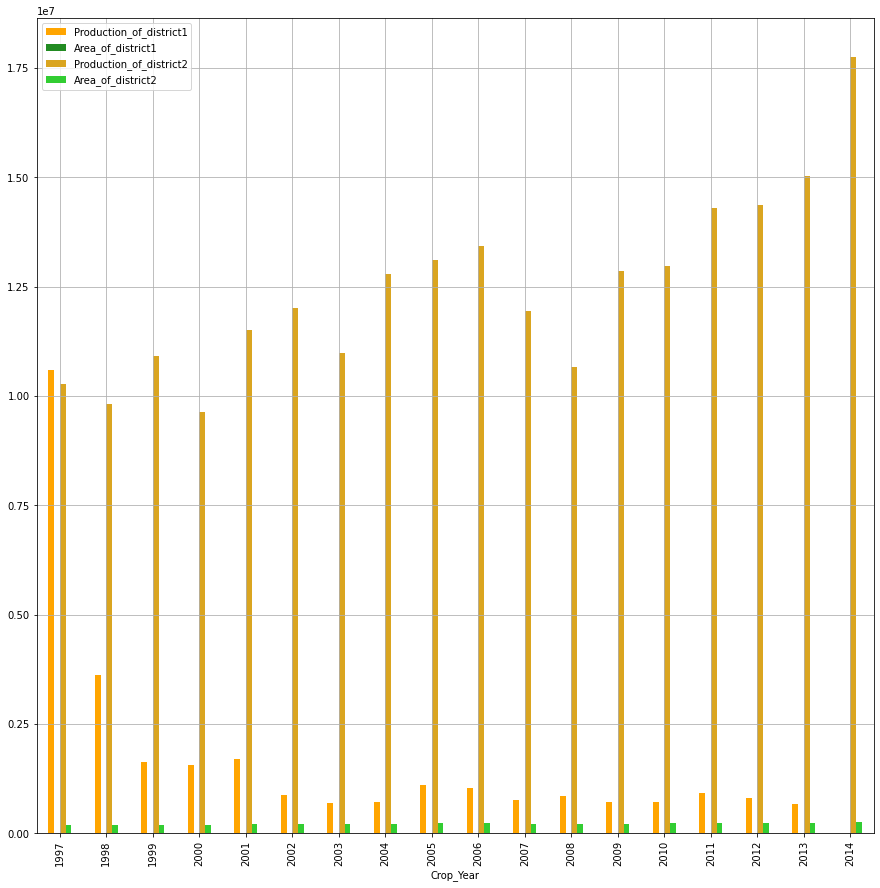

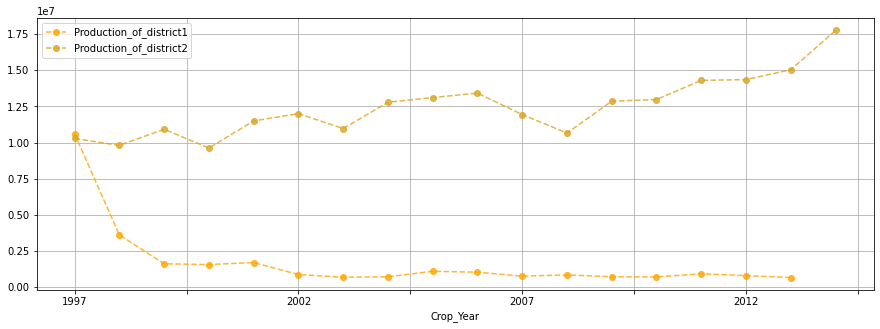

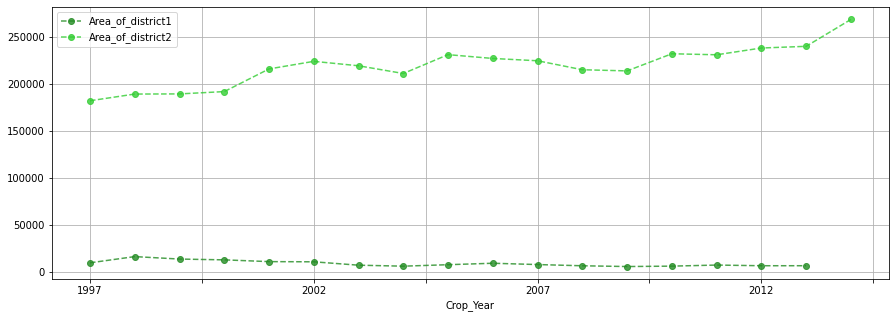

In [67]:
x='Tamil Nadu'
z='THENI'
y='Sugarcane'
cultivation_data = crops_data[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
  
cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
cultivation_data=cultivation_data.groupby('District_Name').get_group(z)
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
  
a='Uttar Pradesh'
c='KHERI'
b='Sugarcane'
cultivation_data1 = crops_data[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
  
cultivation_data1=cultivation_data1.groupby('State_Name').get_group(a)
cultivation_data1=cultivation_data1.groupby('District_Name').get_group(c)
cultivation_data1=cultivation_data1.groupby('Crop').get_group(b)
cultivation_data1=cultivation_data1.groupby('Crop_Year')[['Production', 'Area']].sum()

cultivation_data.rename(columns={'Production':'Production_of_district1'}, inplace=True)
cultivation_data.rename(columns={'Area':'Area_of_district1'}, inplace=True)
cultivation_data1.rename(columns={'Production':'Production_of_district2'}, inplace=True)
cultivation_data1.rename(columns={'Area':'Area_of_district2'}, inplace=True)
df12=pd.concat([cultivation_data, cultivation_data1], axis=1)

print(df12)
ax=df12.plot(kind='bar', figsize=(15,15), color=['orange', 'forestgreen', 'goldenrod', 'limegreen'], grid=True)
print("COMPARISON OF PRODUCTION")
ax=df12.plot(y=['Production_of_district1', 'Production_of_district2'], figsize=(15,5), color=['orange', 'goldenrod'], grid=True, linestyle='dashed', marker='o', alpha=0.8, markersize=6)
print("COMPARISON OF AREA")
ax=df12.plot(y=['Area_of_district1', 'Area_of_district2'], figsize=(15,5), color=['forestgreen', 'limegreen'], grid=True, linestyle='dashed', marker='o', alpha=0.8, markersize=6)

                        Production       Area
State_Name                                   
Karnataka                4213579.0  1337084.0
Bihar                    2478745.0   706518.0
Telangana                2308051.0   691471.0
Maharashtra              2201200.0  1076200.0
Andhra Pradesh           1938073.0   303326.0
Uttar Pradesh            1279257.0   715753.0
West Bengal               649884.0   151797.0
Punjab                    460000.0   126000.0
Jammu and Kashmir         359960.0   297496.0
Chhattisgarh              235014.0   125074.0
Odisha                    188199.1    91664.0
Nagaland                  135940.0    68820.0
Assam                      93179.0    27953.0
Arunachal Pradesh          75000.0    48000.0
Sikkim                     68890.0    39880.0
Uttarakhand                49215.0    23793.0
Meghalaya                  40764.0    18037.0
Tripura                     5963.0     4519.0
Dadra and Nagar Haveli       110.0      110.0
Kerala                        69.0

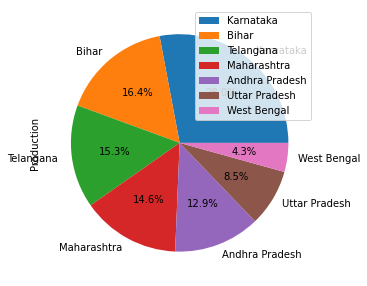

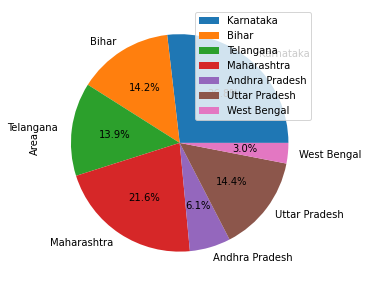

In [75]:
x='2014'
y='Maize'
  
dd1=crops_data[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]

dd1=dd1.groupby('Crop_Year').get_group(x)
dd1=dd1.groupby('Crop').get_group(y)
dd1=dd1.groupby('State_Name')[['Production', 'Area']].sum()
dd1=dd1.sort_values(by='Production', ascending=False)
print(dd1)
print("Pie chart plot of the data for top ten states")
dd1[:7].plot(kind='pie', y='Production', figsize=(5,5), autopct='%1.1f%%')
dd1[:7].plot(kind='pie', y='Area', figsize=(5,5), autopct='%1.1f%%')
print('Joint plot showing the about the ratio')

In [82]:
models = []
models.append(LinearRegression())
models.append(DecisionTreeRegressor())
models.append(KNeighborsRegressor(n_neighbors = 2))
models.append(SVR(gamma='auto'))
names=['LR', 'DTR', 'KNR', 'SVR']

Explained variance score for different models
LR :  0.025012499980879732
DTR :  0.39138150604734767
KNR :  0.254571861237493
SVR :  0.0
DecisionTreeRegressor()
Production will be 5439685.0


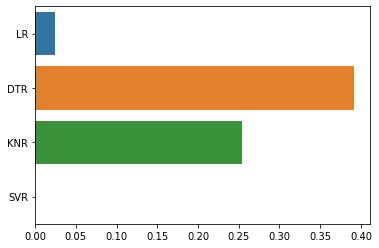

In [83]:
x='Summer'
y='Rice'
cultivation_data=crops_data[['Season', 'Crop_Year', 'Crop', 'Area', 'Production']]
cultivation_data=cultivation_data.groupby('Season').get_group(x)
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
predofprod=list()
X = cultivation_data['Area'].values.reshape(-1, 1)
Y = cultivation_data['Production'].ravel()
validation_size = 0.30
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size)
varlist=list()
for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    #print(explained_variance_score(y_test, y_pred))
    r1=explained_variance_score(y_test, y_pred)
    varlist.append(r1)
print("Explained variance score for different models")
print('LR : ', varlist[0])
print('DTR : ', varlist[1])
print('KNR : ', varlist[2])
print('SVR : ', varlist[3])
sns.barplot(x=varlist, y=names)  
best_model_var=varlist[0]
best_model=models[0]
for i in range(len(names)):
    if varlist[i]>best_model_var:
        best_model_var=varlist[i]
        best_model=models[i]
print(best_model)

best_model.fit(X_train, y_train)
z=12345
predofprod=list()
predofprod.append(z)
predofprod=np.reshape(predofprod, (1,-1))
prod=best_model.predict(predofprod)
print("Production will be",prod[0])